In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [79]:
df=pd.read_csv('CreditData_Default.csv')

In [80]:
df.shape

(30000, 24)

In [81]:
df.describe

<bound method NDFrame.describe of        LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0          20000    2          2         1   24      2      2     -1     -1   
1         120000    2          2         2   26     -1      2      0      0   
2          90000    2          2         2   34      0      0      0      0   
3          50000    2          2         1   37      0      0      0      0   
4          50000    1          2         1   57     -1      0     -1      0   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
29995     220000    1          3         1   39      0      0      0      0   
29996     150000    1          3         2   43     -1     -1     -1     -1   
29997      30000    1          2         2   37      4      3      2     -1   
29998      80000    1          3         1   41      1     -1      0      0   
29999      50000    1          2         1   46      0      0      0      0   

       PAY_5  ...

In [82]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [83]:
df['default'].value_counts()

0    23364
1     6636
Name: default, dtype: int64

In [97]:
df[df['default']==1]['PAY_AMT1'].sum()/df[df['default']==1]['BILL_AMT1'].sum()

0.07002891809048793

In [96]:
df[df['default']==0]['PAY_AMT1'].sum()/df[df['default']==0]['BILL_AMT1'].sum()

0.1213084160965198

In [98]:
df[df['default']==1]['PAY_AMT2'].sum()/df[df['default']==1]['BILL_AMT2'].sum()

0.07166646278324933

In [99]:
df[df['default']==0]['PAY_AMT2'].sum()/df[df['default']==0]['BILL_AMT2'].sum()

0.13356411055700296

In [100]:
df[df['default']==1]['PAY_AMT3'].sum()/df[df['default']==1]['BILL_AMT3'].sum()

0.07452926971521963

In [101]:
df[df['default']==0]['PAY_AMT3'].sum()/df[df['default']==0]['BILL_AMT3'].sum()

0.12104122566284578

In [102]:
df[df['default']==1]['PAY_AMT4'].sum()/df[df['default']==1]['BILL_AMT4'].sum()

0.07506792690680969

In [103]:
df[df['default']==0]['PAY_AMT4'].sum()/df[df['default']==0]['BILL_AMT4'].sum()

0.12154064876986574

In [104]:
df[df['default']==1]['PAY_AMT5'].sum()/df[df['default']==1]['BILL_AMT5'].sum()

0.08141436606966129

In [105]:
df[df['default']==0]['PAY_AMT5'].sum()/df[df['default']==0]['BILL_AMT5'].sum()

0.12948834516210184

In [107]:
df[df['default']==1]['PAY_AMT6'].sum()/df[df['default']==1]['BILL_AMT6'].sum()

0.08992299406204482

In [106]:
df[df['default']==0]['PAY_AMT6'].sum()/df[df['default']==0]['BILL_AMT6'].sum()

0.14649178847407562

In [52]:
from sklearn.model_selection import train_test_split
X=df.drop('default',axis=1)
y=df['default']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=6120) 

In [53]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [76]:
pred

array([0.24042597, 0.31093689, 0.24102203, ..., 0.22111121, 0.17371449,
       0.11555231])

In [77]:
from sklearn.metrics import classification_report,confusion_matrix
pred=lr.predict(X_test)
pred_round = list(map(round, pred))
print(classification_report(y_test,pred_round))

              precision    recall  f1-score   support

           0       0.70      0.98      0.81      6974
           1       0.83      0.18      0.29      3636

    accuracy                           0.71     10610
   macro avg       0.76      0.58      0.55     10610
weighted avg       0.74      0.71      0.63     10610



<AxesSubplot:xlabel='PAY_AMT1', ylabel='default'>

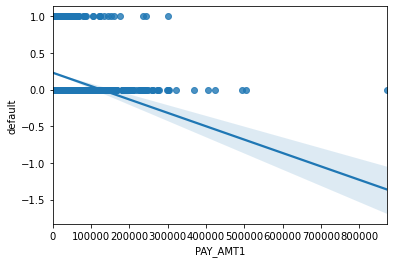

In [55]:
sns.regplot(data=df,x='PAY_AMT1',y='default')

In [56]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      6952
           1       0.20      0.00      0.00      2048

    accuracy                           0.77      9000
   macro avg       0.49      0.50      0.44      9000
weighted avg       0.64      0.77      0.67      9000



D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


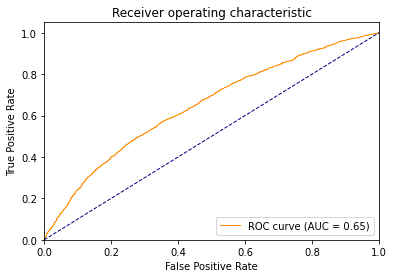

In [57]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (AUC = %0.2f)' % roc_auc)
    
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [58]:
cont_var=['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

In [59]:
from sklearn.preprocessing import StandardScaler
df[cont_var]=StandardScaler().fit_transform(df[cont_var])

In [60]:
X_std=df.drop('default',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_std,y,test_size=0.3, random_state=6120)

In [61]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      6952
           1       0.00      0.00      0.00      2048

    accuracy                           0.77      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.60      0.77      0.67      9000



D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
np.unique(predictions)

array([0], dtype=int64)

In [63]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
solvers = ['liblinear','saga']
penalty = ['l1','l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# score_crit = ['accuracy', 'precision']
log_gridsearch = GridSearchCV(estimator=logmodel, param_grid=grid, n_jobs=-1, cv=cv, scoring='recall', refit=True, error_score=0)
log_gridsearch.fit(X_train, y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=0, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='recall')

In [64]:
loggrid_pred=log_gridsearch.predict(X_test)
print(classification_report(y_test,loggrid_pred))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      6952
           1       0.74      0.22      0.34      2048

    accuracy                           0.81      9000
   macro avg       0.77      0.60      0.61      9000
weighted avg       0.79      0.81      0.76      9000



In [65]:
log_gridsearch.best_params_

{'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}

In [66]:
np.unique(loggrid_pred)

array([0, 1], dtype=int64)

In [68]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE(sampling_strategy={1:12000},random_state=6120)

In [69]:
X=df.drop('default',axis=1)
y=df['default']
X_res, y_res = oversample.fit_resample(X, y)
y_res.value_counts()

0    23364
1    12000
Name: default, dtype: int64

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=6120)
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.66      1.00      0.79      6974
           1       0.00      0.00      0.00      3636

    accuracy                           0.66     10610
   macro avg       0.33      0.50      0.40     10610
weighted avg       0.43      0.66      0.52     10610



D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [72]:
log_gridsearch_os = GridSearchCV(estimator=logmodel, param_grid=grid, n_jobs=-1, cv=cv, scoring='recall', refit=True, error_score=0)
log_gridsearch_os.fit(X_train, y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=0, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='recall')

In [73]:
loggrid_pred_os=log_gridsearch_os.predict(X_test)
print(classification_report(y_test,loggrid_pred_os))

              precision    recall  f1-score   support

           0       0.75      0.92      0.83      6974
           1       0.73      0.41      0.53      3636

    accuracy                           0.75     10610
   macro avg       0.74      0.67      0.68     10610
weighted avg       0.74      0.75      0.72     10610



In [74]:
log_gridsearch_os.best_params_

{'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}

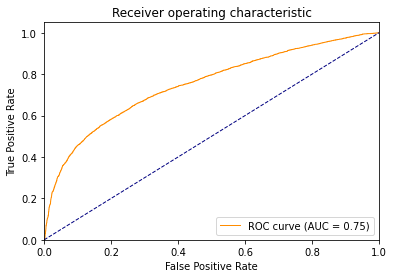

In [75]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, log_gridsearch_os.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (AUC = %0.2f)' % roc_auc)
    
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()